# Intro to Linear Algebra

This topic, *Intro to Linear Algebra*, is the first in the *Machine Learning Foundations* series.

It is essential because linear algebra lies at the heart of most machine learning approaches and is especially predominant in deep learning, the branch of ML at the forefront of today’s artificial intelligence advances. Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces, thereby enabling machines to recognize patterns and make predictions.

The content covered in *Intro to Linear Algebra* is itself foundational for all the other topics in the Machine Learning Foundations series and it is especially relevant to *Linear Algebra II*.

Over the course of studying this topic, you'll:

* Understand the fundamentals of linear algebra, a ubiquitous approach for solving for unknowns within high-dimensional spaces.

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning.
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Data Structures for Algebra*

* What Linear Algebra Is  
* A Brief History of Algebra
* Tensors
* Scalars
* Vectors and Vector Transposition
* Norms and Unit Vectors
* Basis, Orthogonal, and Orthonormal Vectors
* Arrays in NumPy  
* Matrices
* Tensors in TensorFlow and PyTorch

*Segment 2: Common Tensor Operations*

* Tensor Transposition
* Basic Tensor Arithmetic
* Reduction
* The Dot Product
* Solving Linear Systems

*Segment 3: Matrix Properties*

* The Frobenius Norm
* Matrix Multiplication
* Symmetric and Identity Matrices
* Matrix Inversion
* Diagonal Matrices
* Orthogonal Matrices


## Segment 1: Data Structures for Algebra

**Slides used to begin segment, with focus on introducing what linear algebra is, including hands-on paper and pencil exercises.**

### What Linear Algebra Is

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.linspace(0, 50, 1000) # start, finish, n points

Distance travelled by robber: $d = 2.5t$

In [4]:
d_r = 2.5 * t

Distance travelled by sheriff: $d = 3(t-5)$

In [5]:
d_s = 3 * (t-5)

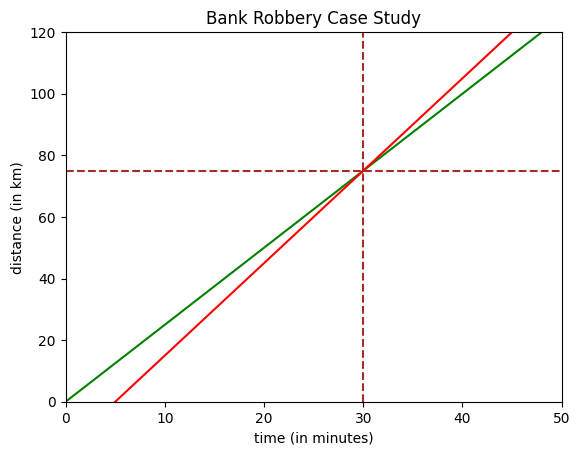

In [6]:
fig, ax = plt.subplots()
plt.title('Bank Robbery Case Study')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 50])
ax.set_ylim([0, 120])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='red')
plt.axvline(x=30, color='brown', linestyle='--')
_ = plt.axhline(y=75, color='brown', linestyle='--')

**Return to slides here.**

### Scalars (Rank 0 Tensors) in Base Python

In [7]:
x = 18
x

18

In [8]:
type(x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

int

In [9]:
y = 36

In [10]:
py_sum = x + y
py_sum

54

In [11]:
type(py_sum)

int

In [12]:
x_float = 56.9
float_sum = x_float + y
float_sum

92.9

In [13]:
type(float_sum)

float

### Scalars in PyTorch

* PyTorch and TensorFlow are the two most popular *automatic differentiation* libraries (a focus of the [*Calculus I*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/3-calculus-i.ipynb) and [*Calculus II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb) subjects in the *ML Foundations* series) in Python, itself the most popular programming language in ML.
* PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays.
* The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see [here](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html) for example).
* Documentation on PyTorch tensors, including available data types, is [here](https://pytorch.org/docs/stable/tensors.html).

**NOTE:**

* PyTorch was created by Facebook and now it is maintained by Linux Foundation.
* It is simpler compared to TensorFlow.

In [14]:
import torch

In [15]:
x_pt = torch.tensor(64) # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(64)

In [16]:
x_pt.shape  # [] indicates it has no dimensions

torch.Size([])

### Scalars in TensorFlow (version 2.0 or later)

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here.

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays.

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

**NOTE:**

* TensorFlow is created by Google Team and is still maintained by them.
* They have a great community and have lots of other libraries for production.
* It is more complex and lengthy compared to PyTorch.

In [17]:
import tensorflow as tf

In [18]:
x_tf = tf.Variable(76, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=76>

In [19]:
x_tf.shape  # [] indicates it has no dimensions

TensorShape([])

In [20]:
y_tf = tf.Variable(4, dtype=tf.int16)
y_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=4>

In [21]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=80>

In [22]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=80>

In [23]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

np.int16(80)

In [24]:
type(tf_sum.numpy())

numpy.int16

In [25]:
tf_float = tf.Variable(94.1, dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=94.125>

**Return to slides here.**

### Vectors (Rank 1 Tensors) in NumPy

In [26]:
x = np.array([2, 22, 15]) # type argument is optional, e.g.: dtype=np.float16
x

array([ 2, 22, 15])

In [27]:
len(x)

3

In [28]:
x.shape

(3,)

In [29]:
type(x)

numpy.ndarray

In [30]:
x[0] # zero-indexed

np.int64(2)

In [31]:
type(x[0])

numpy.int64

### Vector Transposition

In [32]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([ 2, 22, 15])

In [33]:
x_t.shape

(3,)

In [34]:
# ...but it does we use nested "matrix-style" brackets:
y = np.array([[5, 2, 5]])
y

array([[5, 2, 5]])

In [35]:
y.shape

(1, 3)

In [36]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent:
y_t = y.T
y_t

array([[5],
       [2],
       [5]])

In [37]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [38]:
# Column vector can be transposed back to original row vector:
y_t.T

array([[5, 2, 5]])

In [39]:
y_t.T.shape

(1, 3)

### Zero Vectors

Have no effect if added to another vector

In [40]:
z = np.zeros(3)
z

array([0., 0., 0.])

### Vectors in PyTorch and TensorFlow

In [41]:
x_pt = torch.tensor([27, 29, 5])
x_pt

tensor([27, 29,  5])

In [42]:
x_tf = tf.Variable([27, 29, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([27, 29,  5], dtype=int32)>

**Return to slides here.**

### $L^2$ Norm

In [43]:
x

array([ 2, 22, 15])

In [44]:
(2**2 + 22**2 + 15**2)**(1/2)

26.70205984563738

In [45]:
np.linalg.norm(x)

np.float64(26.70205984563738)

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

**Return to slides here.**

### $L^1$ Norm

In [46]:
x

array([ 2, 22, 15])

In [47]:
np.abs(2) + np.abs(22) + np.abs(15)

np.int64(39)

**Return to slides here.**

### Squared $L^2$ Norm

$L^2$ norm equals simply $x^Tx$

In [48]:
x

array([ 2, 22, 15])

In [49]:
(2**2 + 22**2 + 15**2)

713

In [50]:
# we'll cover tensor multiplication more soon but to prove point quickly:
np.dot(x, x)

np.int64(713)

**Return to slides here.**

### Max Norm

In [51]:
x

array([ 2, 22, 15])

In [52]:
np.max([np.abs(2), np.abs(22), np.abs(15)])

np.int64(22)

**Return to slides here.**

### Orthogonal Vectors

In [53]:
i = np.array([1, 0])
i

array([1, 0])

In [54]:
j = np.array([0, 1])
j

array([0, 1])

x and y are orthgonal vectors if $x^Ty=0$

In [55]:
np.dot(i, j) # detail on the dot operation coming up...

np.int64(0)

**Return to slides here.**

### Matrices (Rank 2 Tensors) in NumPy

In [56]:
# Use array() with nested brackets:
X = np.array([[2, 8], [5, 26], [3, 7], [6, 8]])
X

array([[ 2,  8],
       [ 5, 26],
       [ 3,  7],
       [ 6,  8]])

In [57]:
X.shape

(4, 2)

In [58]:
X.size

8

In [69]:
# Select left column of matrix X (zero-indexed)
X[:,1]

array([ 8, 26,  7,  8])

In [60]:
# Select the second row of matrix X:
X[1,:]

array([ 5, 26])

In [71]:
# Another slicing-by-index example:
X[2:4, 0:2]

array([[3, 7],
       [6, 8]])

### Matrices in PyTorch

In [72]:
X_pt = torch.tensor([[2, 8], [5, 26], [3, 7], [6, 8]])
X_pt

tensor([[ 2,  8],
        [ 5, 26],
        [ 3,  7],
        [ 6,  8]])

In [73]:
X_pt.shape # pythonic relative to TensorFlow

torch.Size([4, 2])

In [75]:
X_pt[2,:] # N.B.: Python is zero-indexed; written algebra is one-indexed

tensor([3, 7])

### Matrices in TensorFlow

In [76]:
X_tf = tf.Variable([[2, 8], [5, 26], [3, 7], [6, 8]])
X_tf

<tf.Variable 'Variable:0' shape=(4, 2) dtype=int32, numpy=
array([[ 2,  8],
       [ 5, 26],
       [ 3,  7],
       [ 6,  8]], dtype=int32)>

In [77]:
tf.rank(X_tf)  # rank: 0 is scalar, 1 is vector, 2 is matrix

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [78]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 2], dtype=int32)>

In [79]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

**Return to slides here.**